In [1]:
#conda install -c districtdatalabs yellowbrick
#!pip install yellowbrick

## <b><div style='padding:15px;background-color:#003f88;color:white;border-radius:2px;font-size:110%;text-align: left'>UNSUPERVISED MACHINE LEARNING
</div></b>

> Naturally in Machine Learning, We often implemement UnSupervised ML models as either; a part of the Feature Engineering Process,i.e
to either help us obtain more insights during the EDA, or as a step to reduce the dimensions to improve the performance of any Supervised ML model.
In this case scenario, we are implememnting it as part of the feature engineering process, in order to aid us obtaim nore insights from our data

> For this class simulation, we will use the  pca for feature decomposition and kmeans as a clustering algorithm, please feel free to research and test implememnt 'other' decomposition algortihms listed above and other clustering algorithms explored above too, compare the performances and you can decide to stick with a combination that suits you

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### DATA OVERVIEW

In [3]:
data1 = pd.read_csv('tourism.csv')
data = data1.copy()
data.head(3)

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            3695 non-null   object 
 4   total_female           4806 non-null   float64
 5   total_male             4804 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_female,4806.0,9.267582e-01,1.288242e+00,0.0,0.0,1.0,1.0,49.0
total_male,4804.0,1.009575e+00,1.138865e+00,0.0,1.0,1.0,1.0,44.0
night_mainland,4809.0,8.488043e+00,1.042762e+01,0.0,3.0,6.0,11.0,145.0
night_zanzibar,4809.0,2.304429e+00,4.227080e+00,0.0,0.0,0.0,4.0,61.0
total_cost,4809.0,8.114389e+06,1.222490e+07,49000.0,812175.0,3397875.0,9945000.0,99532875.0


In [6]:
data.describe(include = 'object').T

,count,unique,top,freq
ID,4809,4809,tour_999,1
country,4809,105,UNITED STATES OF AMERICA,695
age_group,4809,4,25-44,2487
travel_with,3695,5,Alone,1265
purpose,4809,7,Leisure and Holidays,2840
main_activity,4809,9,Wildlife tourism,2259
info_source,4809,8,"Travel, agent, tour operator",1913
tour_arrangement,4809,2,Independent,2570
package_transport_int,4809,2,No,3357
package_accomodation,4809,2,No,2602


In [7]:
data.isnull().sum()

ID                          0
country                     0
age_group                   0
travel_with              1114
total_female                3
total_male                  5
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing           313
total_cost                  0
dtype: int64

In [8]:
data[data.duplicated()]

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost


In [9]:
data.duplicated().sum()

np.int64(0)

### UNIVARIATE ANALYSIS

                      country    total_cost
100  UNITED STATES OF AMERICA  8.890832e+09
99             UNITED KINGDOM  3.808383e+09
41                      ITALY  3.762160e+09
29                     FRANCE  3.344496e+09
3                   AUSTRALIA  2.743132e+09


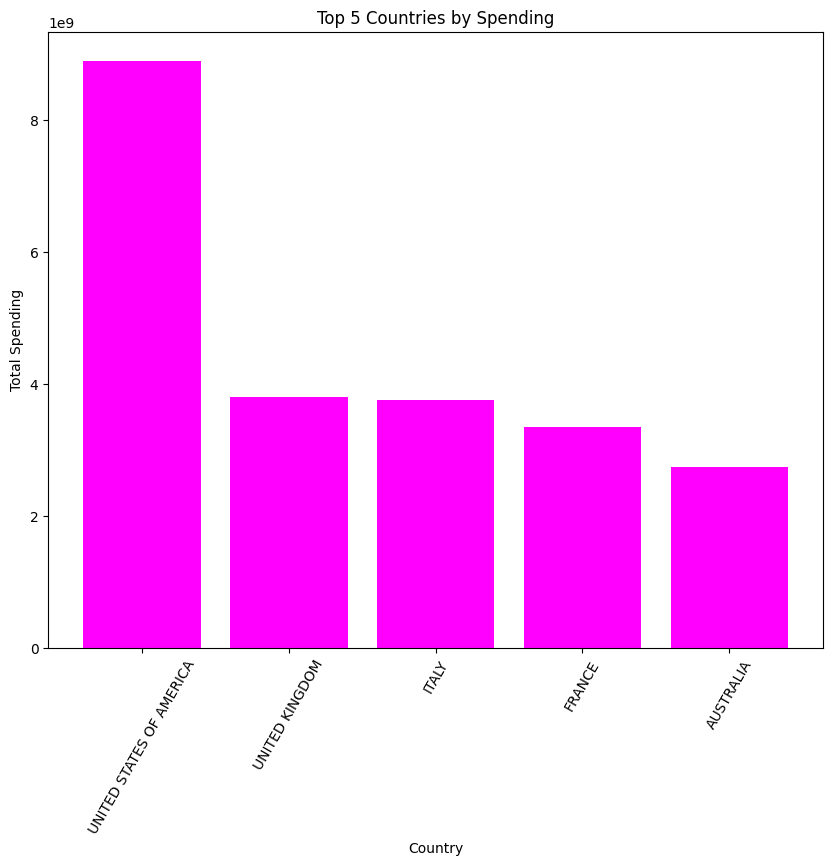

In [10]:
#Top 5 country by spending
country_spending = data.groupby('country')['total_cost'].sum().reset_index()

sort_country_spending = country_spending.sort_values(by='total_cost', ascending=False)

top_5_countries = sort_country_spending.head(5)

plt.figure(figsize=(10,8))
plt.bar(top_5_countries['country'], top_5_countries['total_cost'], color='magenta')
plt.title('Top 5 Countries by Spending')
plt.xlabel('Country')
plt.ylabel('Total Spending')
plt.xticks(rotation=60)
print(top_5_countries)
plt.show()

In [11]:
# Average number on nights spent in Mainland
Avg_night_mainland = round(data['night_mainland'].mean(),2)
Avg_night_mainland

np.float64(8.49)

In [12]:
#Average number on nights spent in Zanzibar
Avg_night_zanzibar = round(data['night_zanzibar'].mean(),2)
Avg_night_zanzibar

np.float64(2.3)

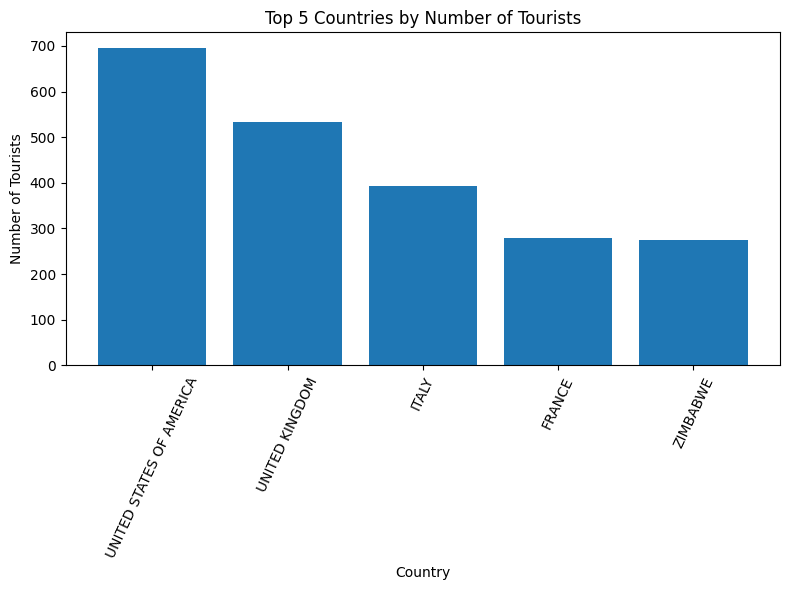

In [13]:
#Top 5 countries by number of tourists
country_tourists_count = data['country'].value_counts().reset_index()

country_tourists_count.columns = ['country', 'tourists_count']

top_5_countries = country_tourists_count.head(5)

plt.figure(figsize=(8, 6))
plt.bar(top_5_countries['country'], top_5_countries['tourists_count'])
plt.title('Top 5 Countries by Number of Tourists')
plt.xlabel('Country')
plt.ylabel('Number of Tourists')
plt.xticks(rotation=65)
plt.tight_layout()
plt.show()

In [14]:
#Country with highest spending tourists
country_spending = data.groupby('country')['total_cost',].sum().reset_index()
country_with_most_spending = country_spending.loc[country_spending['total_cost'].idxmax()]
country_with_most_spending['total_cost'] = '{:.2f}'.format(country_with_most_spending['total_cost'], 2)
print(country_with_most_spending)

country       UNITED STATES OF AMERICA
total_cost               8890832053.70
Name: 100, dtype: object


payment_mode
Cash                 4172
Credit Card           622
Other                   8
Travellers Cheque       7
Name: count, dtype: int64


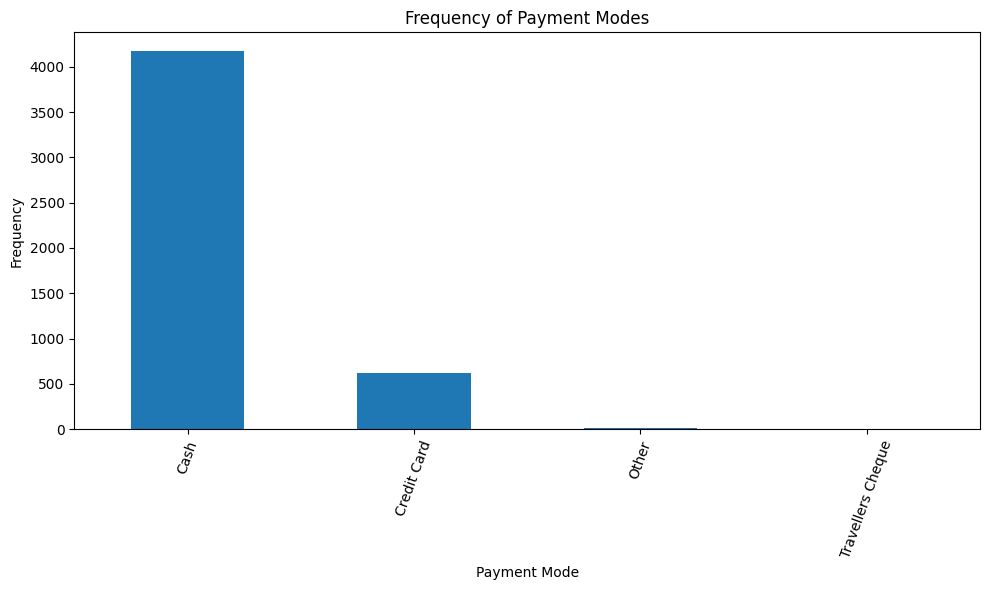

In [15]:
#Methods of payment Visualization

payment_mode_counts = data['payment_mode'].value_counts()

plt.figure(figsize=(10, 6))
payment_mode_counts.plot(kind='bar')
plt.title('Frequency of Payment Modes')
plt.xlabel('Payment Mode')
plt.ylabel('Frequency')
plt.xticks(rotation=70)
plt.tight_layout()
print(payment_mode_counts)
plt.show()

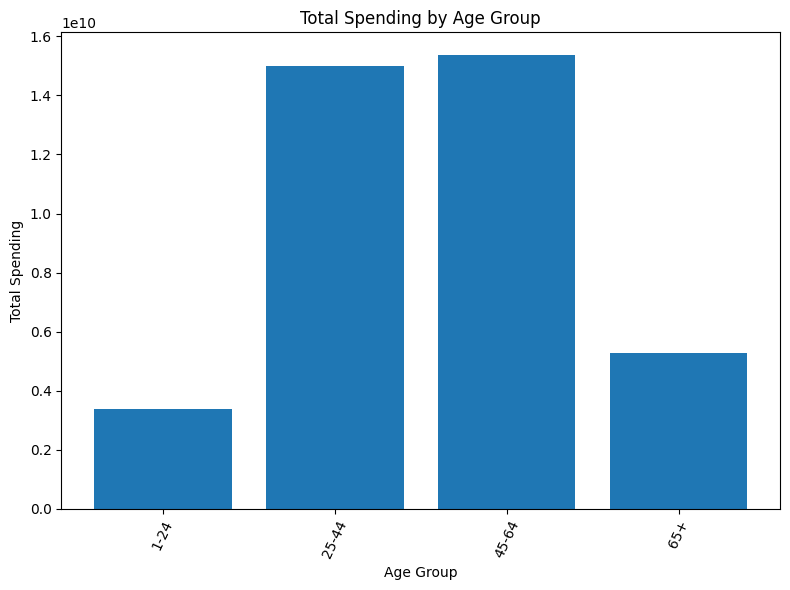

In [16]:
#Spending by Age Group
age_group_spending = data.groupby('age_group')['total_cost'].sum().reset_index()

plt.figure(figsize=(8, 6))
plt.bar(age_group_spending['age_group'], age_group_spending['total_cost'])
plt.title('Total Spending by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Spending')
plt.xticks(rotation=65)
plt.tight_layout()
plt.show();

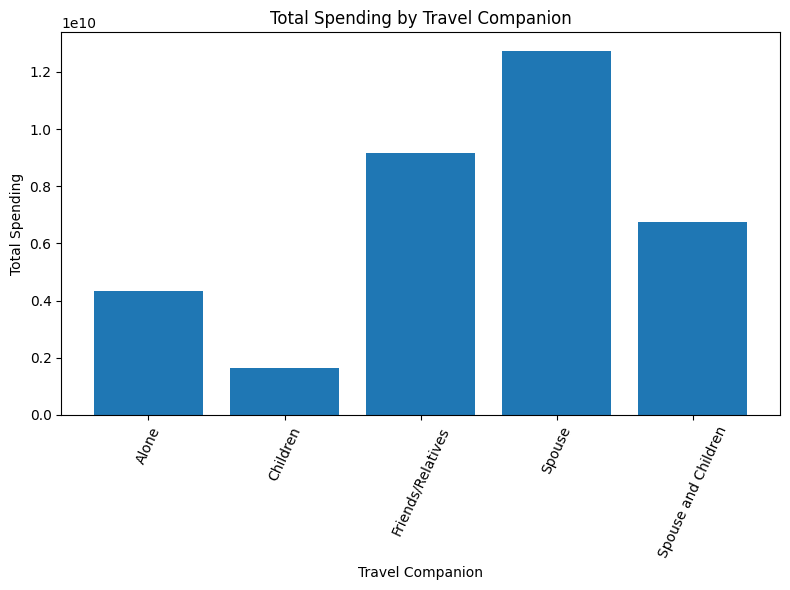

In [17]:
#Spending by Travel With
travel_with_spending = data.groupby('travel_with')['total_cost'].sum().reset_index()

plt.figure(figsize=(8, 6))
plt.bar(travel_with_spending['travel_with'], travel_with_spending['total_cost'])
plt.title('Total Spending by Travel Companion')
plt.xlabel('Travel Companion')
plt.ylabel('Total Spending')
plt.xticks(rotation=65)
plt.tight_layout()
plt.show()

### Univariate Analysis

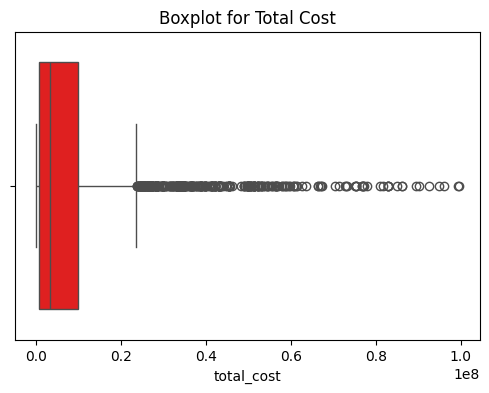

In [18]:
fig, axes = plt.subplots(figsize = (6,4))
sns.boxplot(data = data["total_cost"], orient='h', color='red')
plt.title("Boxplot for Total Cost");

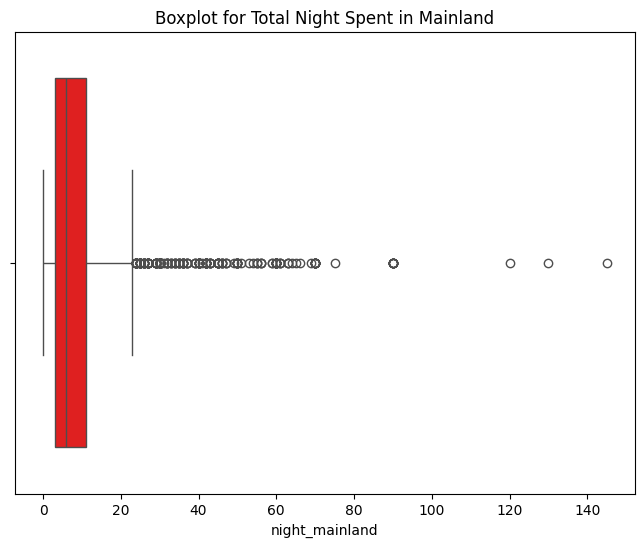

In [19]:
fig, axes = plt.subplots(figsize = (8,6))
sns.boxplot(data = data["night_mainland"], orient='h', color='red')
plt.title("Boxplot for Total Night Spent in Mainland");

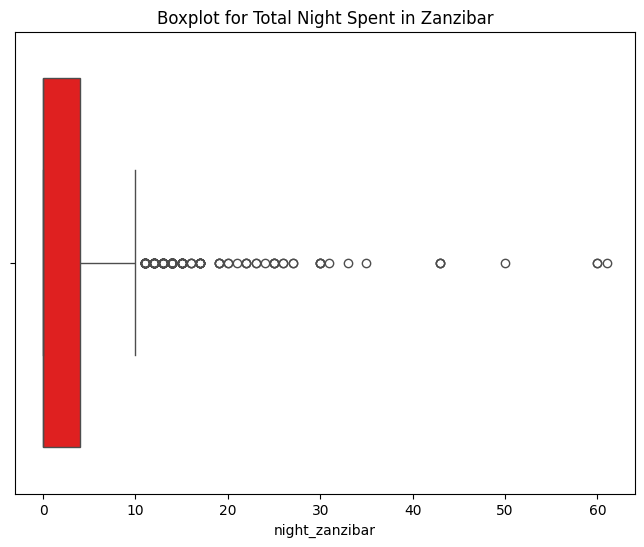

In [20]:
fig, axes = plt.subplots(figsize = (8,6))
sns.boxplot(data = data["night_zanzibar"], orient='h', color='red')
plt.title("Boxplot for Total Night Spent in Zanzibar");

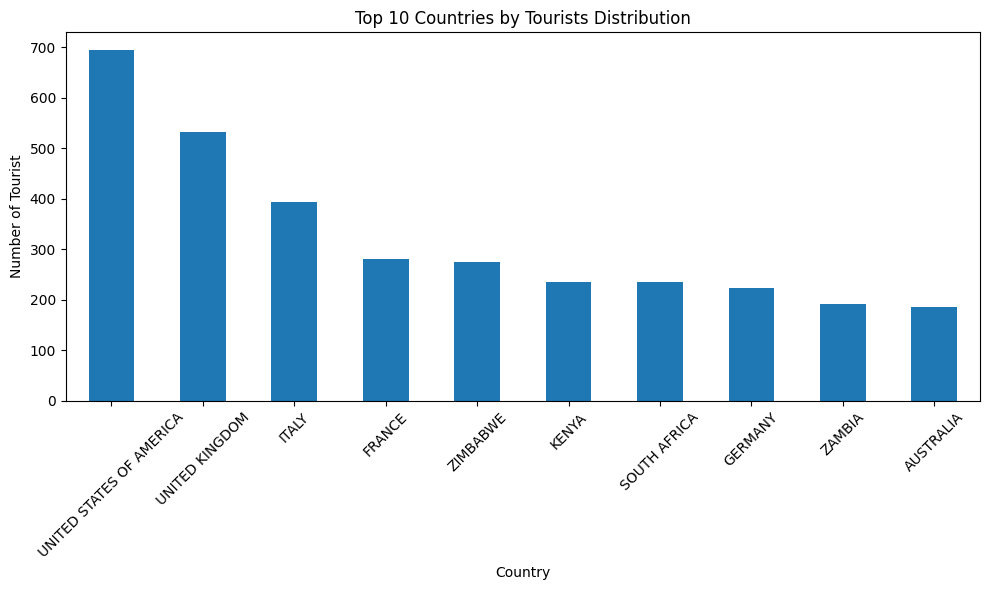

In [21]:
# Top 10 Countries by tourist number

country_counts = data['country'].value_counts()
top_10_countries = country_counts.head(10)

plt.figure(figsize=(10, 6))
top_10_countries.plot(kind='bar')
plt.title('Top 10 Countries by Tourists Distribution')
plt.xlabel('Country')
plt.ylabel('Number of Tourist')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

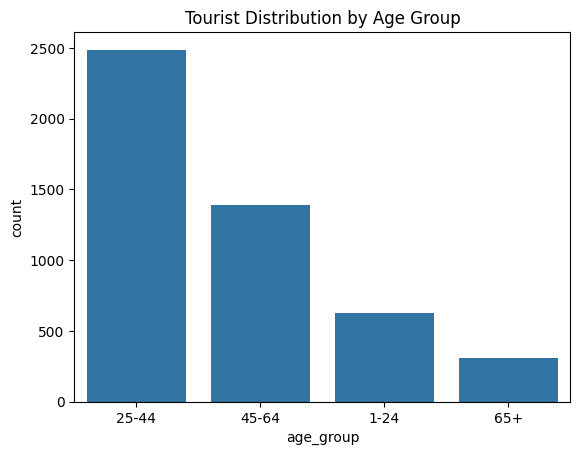

In [22]:
#Age Group Distrubtion
sns.countplot(x=data['age_group'],
              order=data['age_group'].value_counts(ascending=False).index).set(title='Tourist Distribution by Age Group');

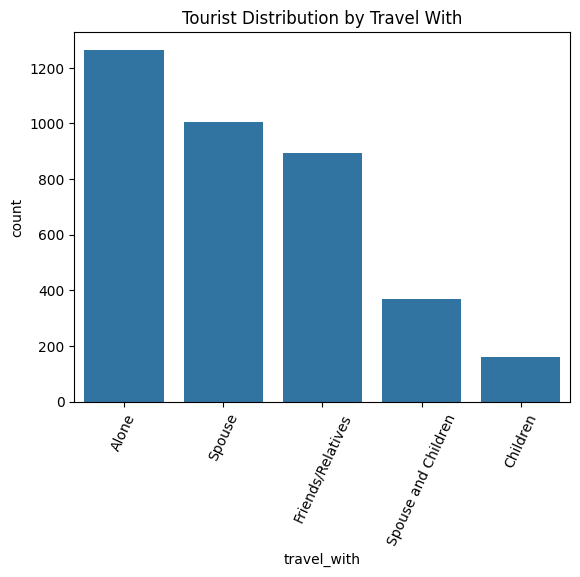

In [23]:
#Distribution by Travel with
sns.countplot(x=data['travel_with'],
              order=data['travel_with'].value_counts(ascending=False).index).set(title='Tourist Distribution by Travel With'),
plt.xticks(rotation=65);

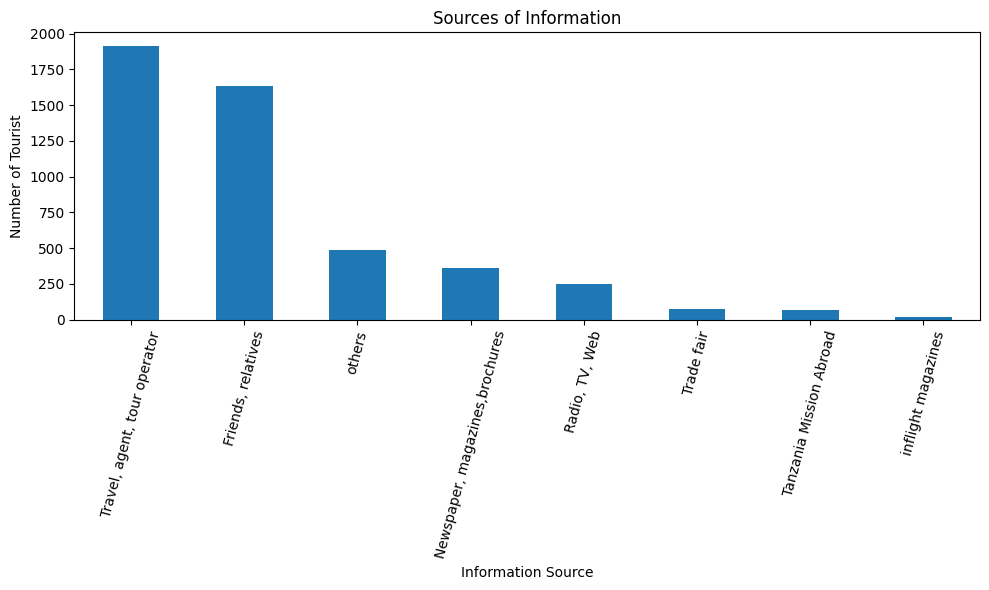

In [24]:
source_of_info = data['info_source'].value_counts()

plt.figure(figsize=(10, 6))
source_of_info.plot(kind='bar')
plt.title('Sources of Information')
plt.xlabel('Information Source')
plt.ylabel('Number of Tourist')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

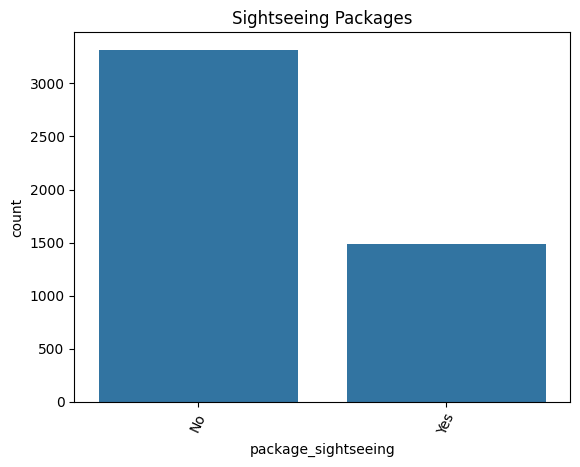

In [25]:
sns.countplot(x=data['package_sightseeing'],
              order=data['package_sightseeing'].value_counts(ascending=False).index).set(title='Sightseeing Packages'),
plt.xticks(rotation=65);

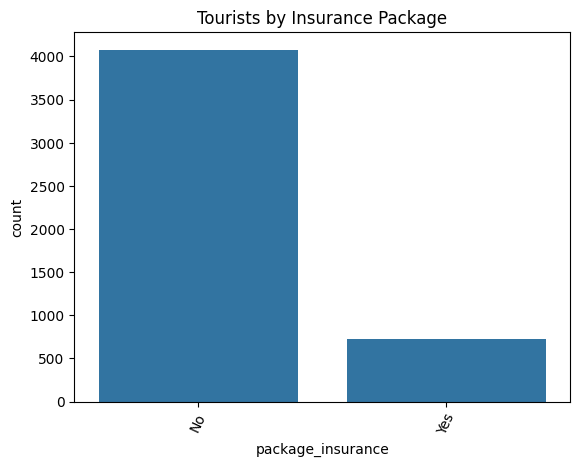

In [26]:
sns.countplot(x=data['package_insurance'],
              order=data['package_insurance'].value_counts(ascending=False).index).set(title='Tourists by Insurance Package'),
plt.xticks(rotation=65);

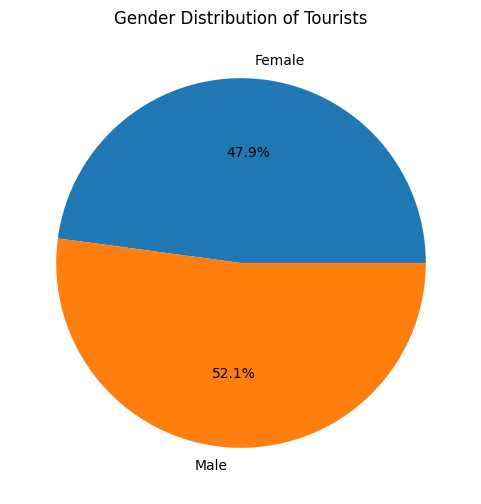

In [27]:
#Gender Distribution
gender_counts = data[['total_female', 'total_male']].sum()
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=['Female','Male'], autopct='%1.1f%%')
plt.title('Gender Distribution of Tourists')
plt.show()

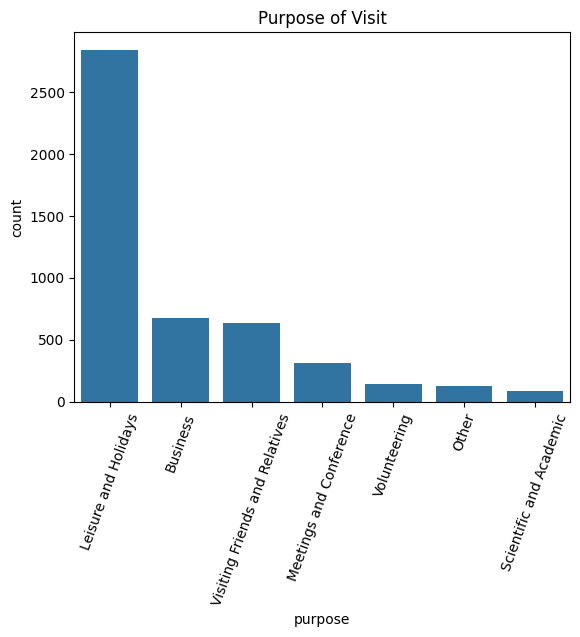

In [28]:
#Purpose of Visit
sns.countplot(x=data['purpose'], order=data['purpose'].value_counts(ascending=False).index).set(title='Purpose of Visit'),
plt.xticks(rotation=70);

### Bivariate Analysis

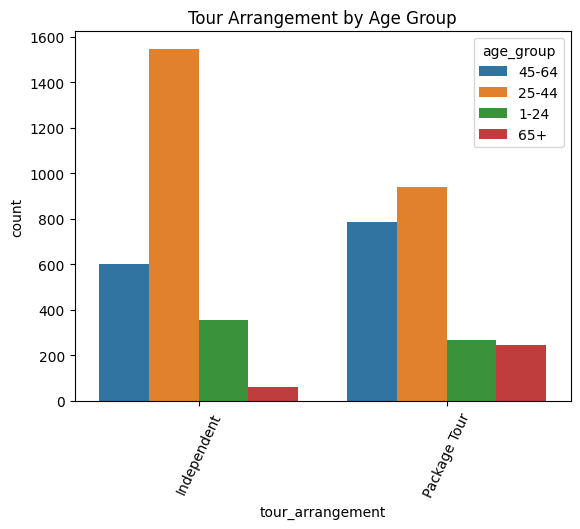

In [29]:
sns.countplot(x=data['tour_arrangement'], hue=data['age_group'], order=data['tour_arrangement'].value_counts(ascending=False).index)
plt.title('Tour Arrangement by Age Group')
plt.xticks(rotation=65)
plt.show()

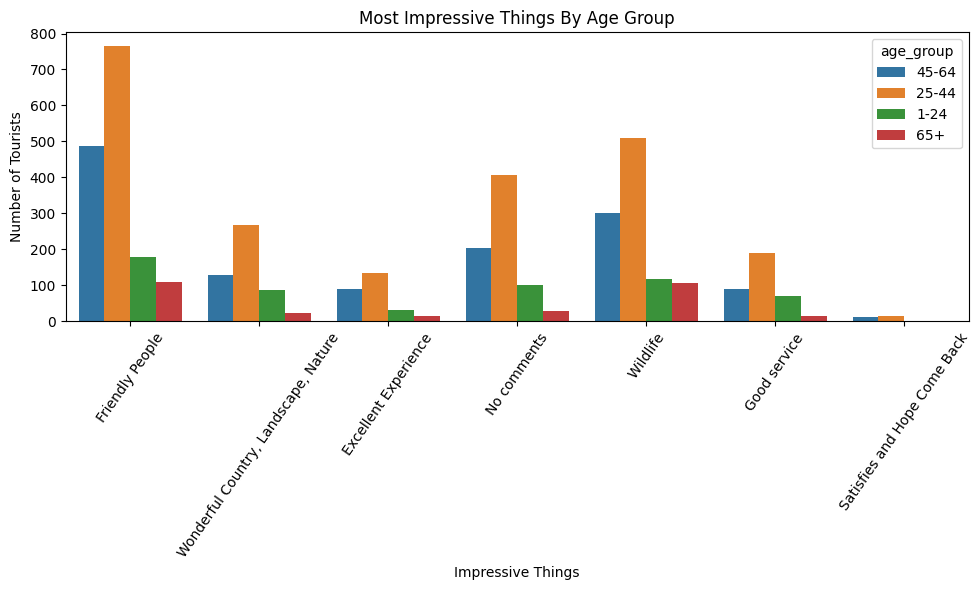

In [30]:
visit_impressive_part = data['most_impressing'].value_counts()

plt.figure(figsize=(10, 6))
sns.countplot(x='most_impressing', hue='age_group', data=data)
plt.title('Most Impressive Things By Age Group')
plt.xlabel('Impressive Things')
plt.ylabel('Number of Tourists')
plt.xticks(rotation=55)
plt.tight_layout()
plt.show()

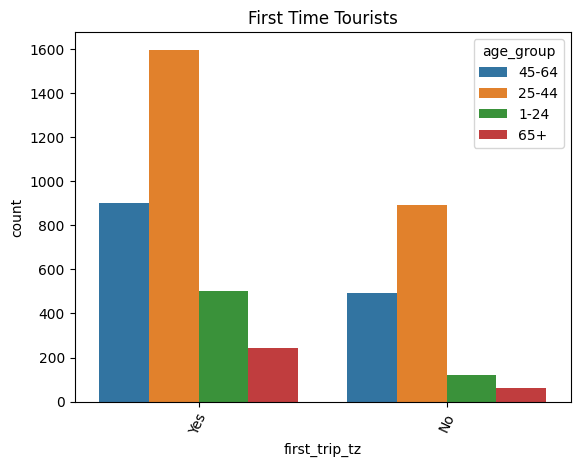

In [31]:
sns.countplot(x=data['first_trip_tz'], hue=data['age_group'],
              order=data['first_trip_tz'].value_counts(ascending=False).index).set(title='First Time Tourists'),
plt.xticks(rotation=65);

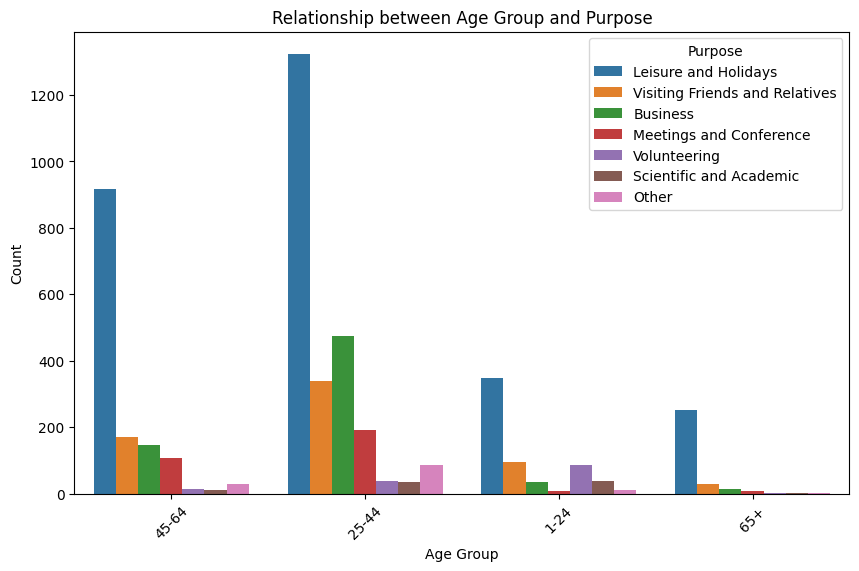

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='purpose', data=data)
plt.title('Relationship between Age Group and Purpose')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Purpose')
plt.show()

### Multivariate Analysis

<Axes: xlabel='purpose', ylabel='total_cost'>

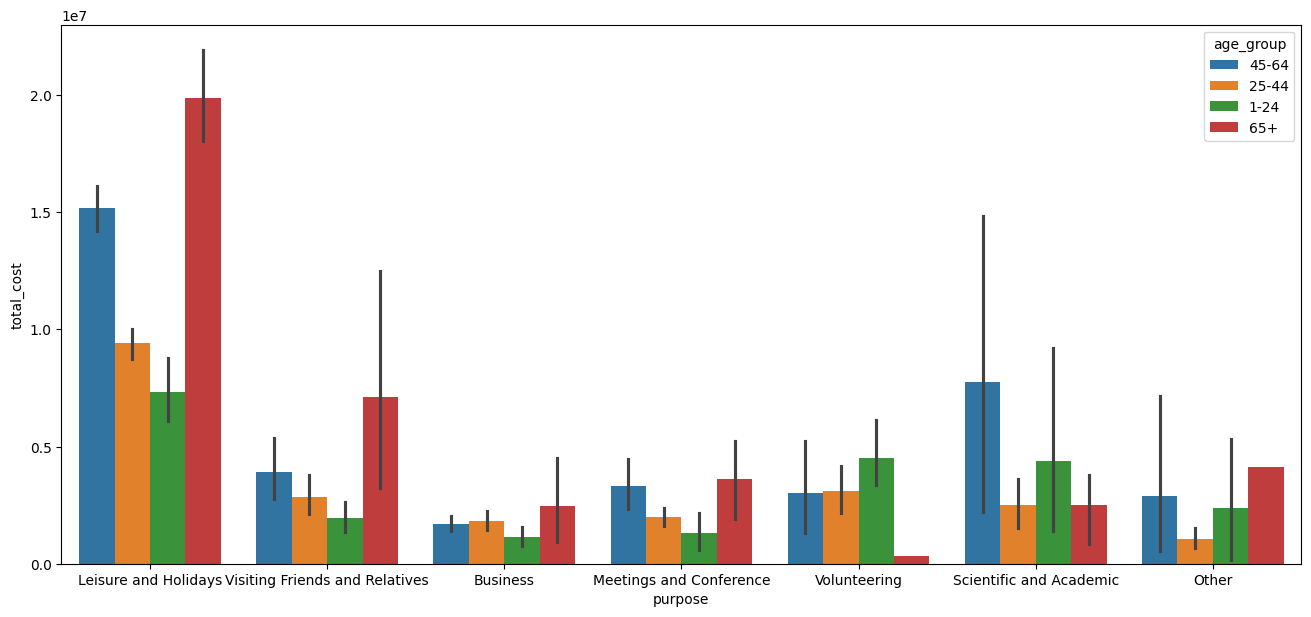

In [33]:
plt.figure(figsize=(16,7))
sns.barplot(x='purpose', y='total_cost', hue='age_group', data=data)

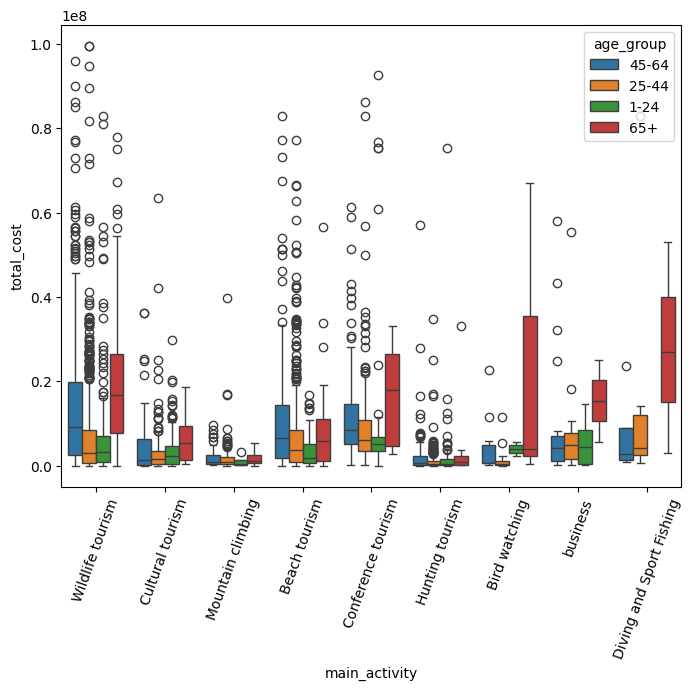

In [34]:
plt.figure(figsize=(8,6))
sns.boxplot(x='main_activity', y='total_cost', hue='age_group', data=data)
plt.xticks(rotation=70);

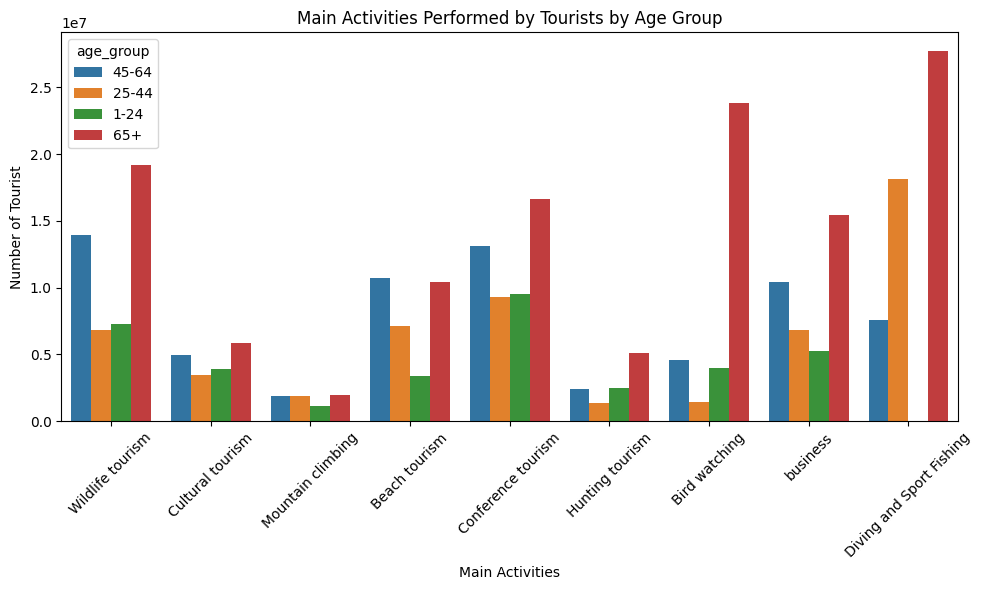

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(x='main_activity', y='total_cost', hue='age_group', data=data, ci=None)
plt.title('Main Activities Performed by Tourists by Age Group')
plt.xlabel('Main Activities')
plt.ylabel('Number of Tourist')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [36]:
data2 = data[['total_female', 'total_male', 'night_mainland', 'night_zanzibar', 'total_cost']]
data3= data2.dropna()

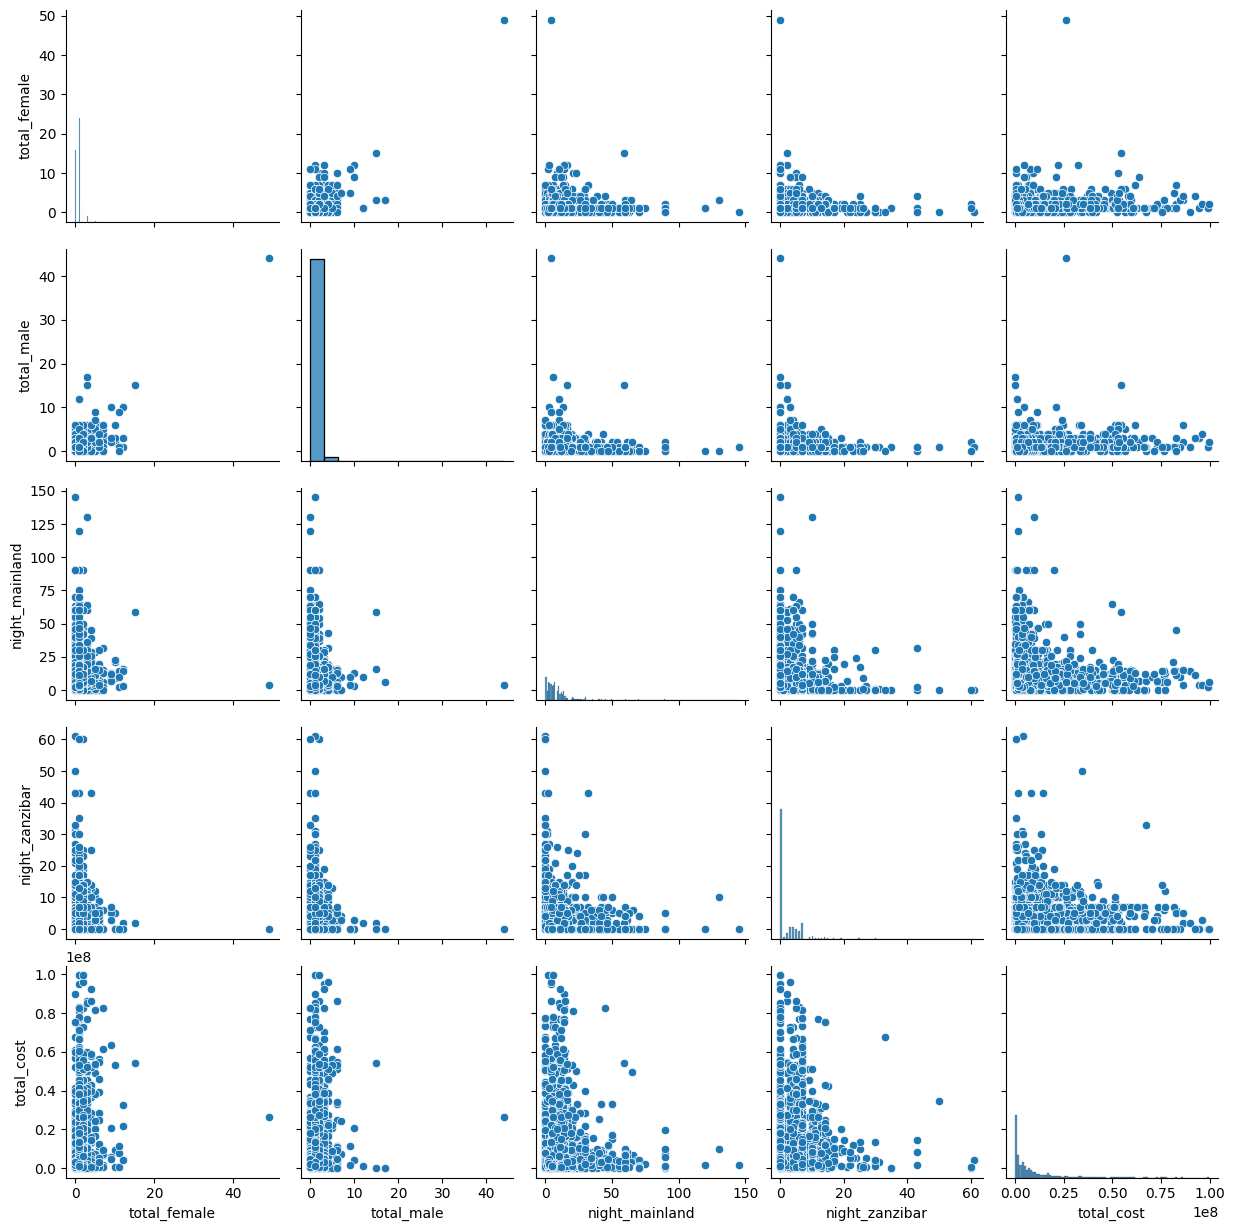

In [37]:
sns.pairplot(data3)
plt.show()

In [38]:
correlation_matrix = data3.corr()

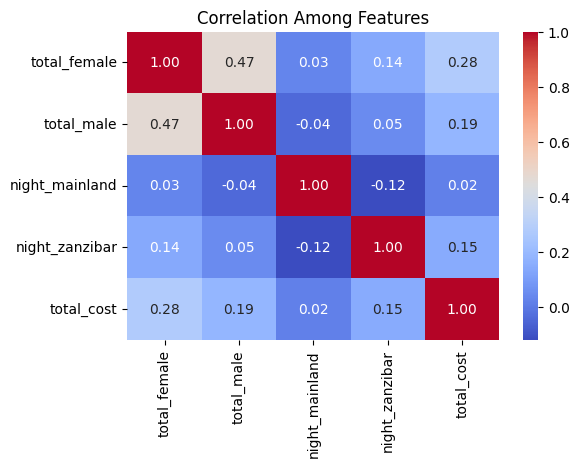

In [39]:
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Among Features')
plt.show()

### DATA PREPROCESSING
- Data Cleaning
- Varaiable Encoding
- Data normalization

In [40]:
#importing libraries for encoding
from sklearn.preprocessing import LabelEncoder

In [42]:
#dropping off missing data points
data2 = data.dropna()
data2
data3 = data2.copy()

In [43]:
data2.isna().sum()

ID                       0
country                  0
age_group                0
travel_with              0
total_female             0
total_male               0
purpose                  0
main_activity            0
info_source              0
tour_arrangement         0
package_transport_int    0
package_accomodation     0
package_food             0
package_transport_tz     0
package_sightseeing      0
package_guided_tour      0
package_insurance        0
night_mainland           0
night_zanzibar           0
payment_mode             0
first_trip_tz            0
most_impressing          0
total_cost               0
dtype: int64

In [44]:
#encode categorical data into num data
cat_var = data2.dtypes == 'object'
cat_var[cat_var]

ID                       True
country                  True
age_group                True
travel_with              True
purpose                  True
main_activity            True
info_source              True
tour_arrangement         True
package_transport_int    True
package_accomodation     True
package_food             True
package_transport_tz     True
package_sightseeing      True
package_guided_tour      True
package_insurance        True
payment_mode             True
first_trip_tz            True
most_impressing          True
dtype: bool

In [45]:
cat_feat = list(cat_var[cat_var].index)
cat_feat

['ID',
 'country',
 'age_group',
 'travel_with',
 'purpose',
 'main_activity',
 'info_source',
 'tour_arrangement',
 'package_transport_int',
 'package_accomodation',
 'package_food',
 'package_transport_tz',
 'package_sightseeing',
 'package_guided_tour',
 'package_insurance',
 'payment_mode',
 'first_trip_tz',
 'most_impressing']

In [46]:
encoder = LabelEncoder()
for x in cat_feat:
    data2[x] = data2[[x]].apply(encoder.fit_transform)

data2.head(3)

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,0,82,2,2,1.0,1.0,1,7,0,0,...,0,0,0,0,13.0,0.0,0,0,2,674602.5
2,1,92,1,0,0.0,1.0,5,3,0,0,...,0,0,0,0,1.0,31.0,0,0,1,3315000.0
3,2,92,1,3,1.0,1.0,1,7,5,1,...,1,1,1,0,11.0,0.0,0,1,2,7790250.0


In [47]:
# import scaler from library
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data2), columns=data.columns)
scaled_data.head(3)

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,0.000000,0.845361,0.666667,0.50,0.020408,0.022727,0.166667,0.875,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.089655,0.000000,0.0,0.0,0.333333,0.006288
1,0.000289,0.948454,0.333333,0.00,0.000000,0.022727,0.833333,0.375,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.006897,0.508197,0.0,0.0,0.166667,0.032829
2,0.000578,0.948454,0.333333,0.75,0.020408,0.022727,0.166667,0.875,0.714286,1.0,...,1.0,1.0,1.0,0.0,0.075862,0.000000,0.0,1.0,0.333333,0.077814


#### Unsupervised Machine Learning
DIMENSIONALITY REDUCTION: 
 - More input features often make a predictive modelling task more challenging to model. This is generally referred to as the curse of dimensionality. So, Dimensionality Reduction refers to techniques used to reduce the number of input variables in a dataset.

 Principal Componenet Analysis (PCA) is a technique for redcuing the dimensions of a large dataset, increasing the interpreatblilty and at the same time minimizing information loss.
  Other exmaples of Dimensionality Reduction techniques include Self Organizing Maps (SOM), t-distributed Stochastic Neighbor Embedding (t-SNE) etc.

- CLUSTERING:
 - Clustering is the process of arranging a group of objects in such a manner that the objects in the same group (which is referred to as a cluster) are more similar to each other than to the objects in any other group.
   - Kmeans Clustering Algorithm - It is a centroid-based algorithm where the user must define the required number of clusters it wants to create.
   - Other examples of clustering algorithms are Agglomerative CL, DBSCAN, Spectral Clustering etc.

In [48]:
#importing required libraries for decomposition, elbow visualizing and clustering
from sklearn.decomposition import PCA

In [49]:
#dimensionality reduction using PCA
#instantiate PCA algorithm
pca = PCA(n_components=3)
pca_df = pd.DataFrame(pca.fit_transform(scaled_data), columns=("dim1","dim2","dim3"))
pca_df

,dim1,dim2,dim3
0,-1.284626,0.359474,-0.453544
1,-1.422874,0.186937,-0.557857
2,1.185569,0.746543,0.315699
3,-1.168339,0.237444,0.408437
4,1.628546,0.197647,-0.039040
...,...,...,...
3455,-1.187059,-0.475302,0.501534
3456,-1.371074,0.293863,-0.572150
3457,1.627942,0.073508,-0.011327
3458,-0.188020,-0.789065,-0.873337


In [50]:
#explain values for the new data
pca.explained_variance_ratio_

array([0.49110188, 0.07528253, 0.05993378])

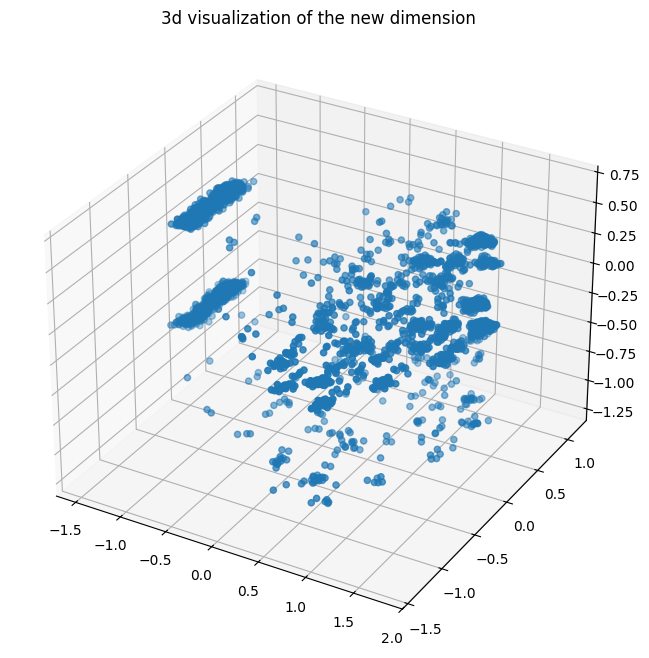

In [51]:
#visualizing our new data dimensions
x = pca_df["dim1"]
y = pca_df["dim2"]
z = pca_df["dim3"]

fig = plt.figure(figsize =(9,8))
ax = fig.add_subplot(111,projection="3d")
ax.scatter(x,y,z, marker="o")
ax.set_title("3d visualization of the new dimension");

In [52]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=10))

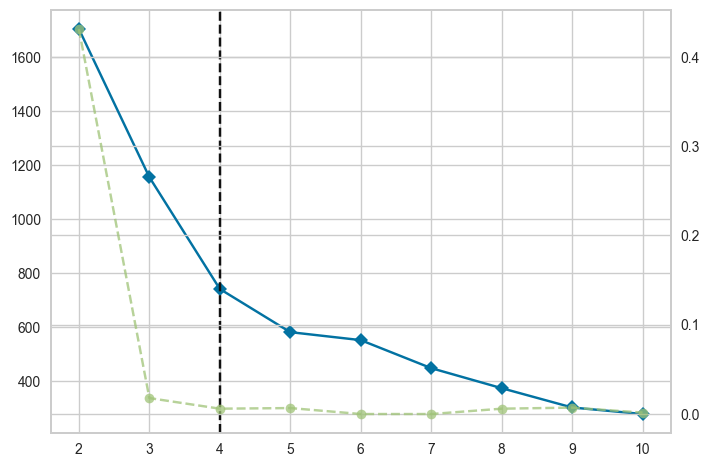

In [53]:
#clustering section
#using the k elbow visualiser method to figure the appropriate number of clusters
elbow_k = KElbowVisualizer(estimator=KMeans())
elbow_k.fit(pca_df)

In [54]:
#apply kmeans clustering on our new dimensions to generate clusters
kmeans = KMeans(n_clusters=4, random_state=42)
pred_clust = kmeans.fit_predict(pca_df)

pca_df["clusters"] = pred_clust
data3["clusters"] = pred_clust
#pca_df
#data3.head(2)

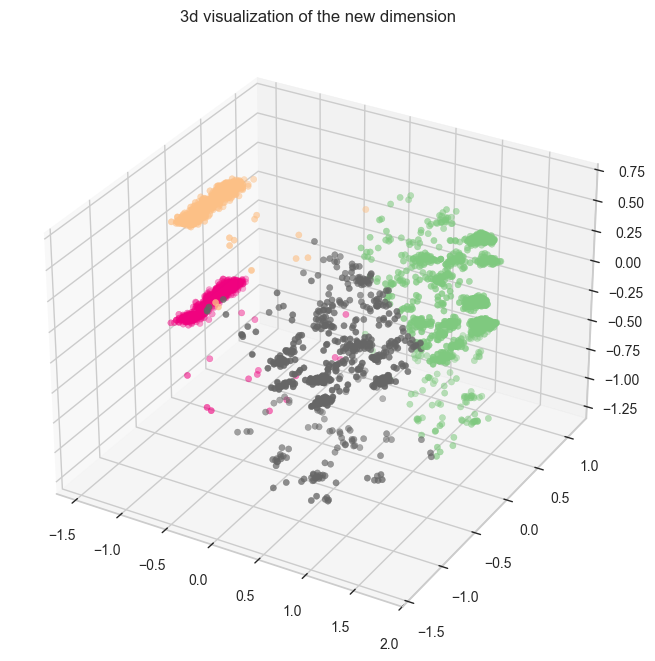

In [55]:
#plotting new data points
cmap ="Accent"
fig = plt.figure(figsize =(9,8))
ax = fig.add_subplot(111,projection="3d")
ax.scatter(x,y,z,c=pca_df.clusters,marker="o", cmap=cmap)
ax.set_title("3d visualization of the new dimension");

In [56]:
#Get cluster centers in the PCA space for Cluster Profiling
cluster_centers_pca = kmeans.cluster_centers_

print(cluster_centers_pca)

[[ 1.28081646  0.29286087  0.0336019 ]
 [-1.12854528 -0.07400876  0.47767628]
 [-1.30948312  0.16958522 -0.48676321]
 [ 0.68764134 -0.71134172 -0.15578897]]


Interpretations
- Cluster 0 : is characterized by features that contribute negatively to dim1 and dim2 but positively to dim3. These tourists likely have lower values on the features that load highly on dim1 and dim2, and higher values on those that load on dim3.

- Cluster 1 : shows high values on the features that load highly on dim1 but lower on those associated with dim2. This could represent tourists who emphasize particular features strongly correlated with dim1.

- Cluster 2 : has above-average values on all three principal components, suggesting these tourists emphasize a mix of features represented by dim1, dim2, and dim3.

- Cluster 3 : Cluster 3 tends to have lower values on the features that load highly on dim1 and dim3, with near-average values on those related to dim2. This might indicate a group of tourists who downplay the features correlated with dim1 and dim3.

In [57]:
# Calculate mean and standard deviation for numerical features of the new dimensions
cluster_summary = pca_df.groupby('clusters').agg(['mean', 'std']).reset_index()
cluster_summary

clusters      dim1                dim2                dim3          
                mean       std      mean       std      mean       std
0        0  1.280126  0.302796  0.292105  0.351700  0.033794  0.300999
1        1 -1.128545  0.118397 -0.074009  0.229150  0.477676  0.075687
2        2 -1.309483  0.144077  0.169585  0.222381 -0.486763  0.076938
3        3  0.687075  0.348332 -0.713160  0.382208 -0.156827  0.377744

In [58]:
# Inverse transform to get cluster centers in the original feature space
cluster_centers_original = pca.inverse_transform(cluster_centers_pca)

# Create a DataFrame for cluster centers
cluster_centers_df = pd.DataFrame(data=cluster_centers_original, columns=scaled_data.columns)
cluster_centers_df['Cluster'] = range(4)

print(cluster_centers_df)

         ID   country  age_group  travel_with  total_female  total_male  \
0  0.470476  0.605577   0.541013     0.525663      0.025823    0.025557   
1  0.503127  0.613588   0.339383     0.402066      0.021020    0.025037   
2  0.526734  0.749169   0.421806     0.189742      0.013837    0.022726   
3  0.522351  0.492633   0.434964     0.672117      0.028617    0.030393   

    purpose  main_activity  info_source  tour_arrangement  ...  \
0  0.176242       0.778323     0.616277          1.011096  ...   
1  0.318324       0.491053     0.346704          0.039533  ...   
2  0.366967       0.547544     0.245521          0.036575  ...   
3  0.221227       0.216705     0.541389          0.878868  ...   

   package_sightseeing  package_guided_tour  package_insurance  \
0             0.892125             0.898612           0.351270   
1            -0.013412            -0.008291          -0.031541   
2            -0.012995            -0.022288          -0.035377   
3             0.265890       

In [59]:
# Get PCA loadings
loadings = pca.components_
loading_df = pd.DataFrame(loadings, columns=scaled_data.columns, index=['dim1', 'dim2', 'dim3'])

print(loading_df)

# Describe clusters
for i in range(4):  # the range should is based on the number of clusters
    print(f"Cluster {i} Profile:")
    print(cluster_centers_df.loc[cluster_centers_df['Cluster'] == i].drop(columns=['Cluster']).T)
    print("\n")

            ID   country  age_group  travel_with  total_female  total_male  \
dim1 -0.013608 -0.044209   0.056872     0.113211      0.003872    0.001215   
dim2 -0.037689  0.156098   0.086043    -0.238851     -0.006049   -0.005672   
dim3 -0.031444 -0.092860  -0.074400     0.138585      0.005194    0.000735   

       purpose  main_activity  info_source  tour_arrangement  ...  \
dim1 -0.066125       0.052001     0.128450          0.399146  ...   
dim2  0.001370       0.516819    -0.015790         -0.086436  ...   
dim3 -0.037685       0.062206     0.076827         -0.093649  ...   

      package_transport_tz  package_sightseeing  package_guided_tour  \
dim1              0.375314             0.319684             0.327115   
dim2              0.039267             0.425884             0.384588   
dim3             -0.072912             0.047160             0.050281   

      package_insurance  night_mainland  night_zanzibar  payment_mode  \
dim1           0.169890       -0.004362        0

Interpretation
- Dim1: The first principal component has high loadings on tour arrangement, package transport int, package sightseeing, package guided tour, and total cost. This suggests it captures variance related to package services and expenditures.
- Dim2: The second principal component has high loadings on main activity and negatively on package sightseeing and package guided tour. This dimension seems to capture variance related to the main activities of tourists and their package preferences.
- Dim3: The third principal component has loadings indicating some relation to country and travel with, but with less distinct patterns compared to Dim1 and Dim2.

### CLUSTERING MODEL EVALUATION
There isn't a sure or single most appropriate way to evaluate a clustering algorithm, as this can vary by the nature of problem
being solved, the domain of that problem, and the business metric of the domain in light.
For thsi Case Study, we are going to be using the Silhouette score in evaluating our model's performance, Feel free to research, explore and experiment with other methods for evaluating clustering algortihms
> The silhouette coefficient measures how close the data points are to their clusters compared to other clusters. The silhouette coefficient values range from -1 to 1, where the closer the values are to 1, the better they are.

In [60]:
# Calculate the silhouette score
from sklearn.metrics import silhouette_score

In [61]:
score = silhouette_score(pca_df,pca_df["clusters"],metric='euclidean')
print(f'silhouette_score is: {score}')

silhouette_score is: 0.7468466121836115


### Now Carry EDA post Feature Engineering

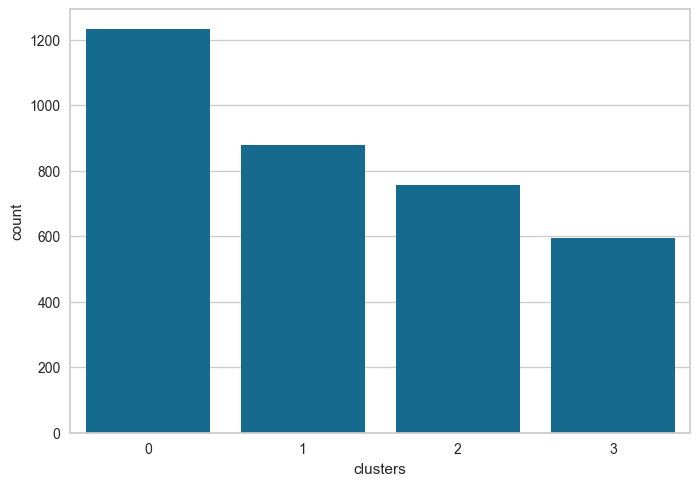

In [62]:
#univariate distribution of the new feature
sns.countplot(x=data3.clusters);

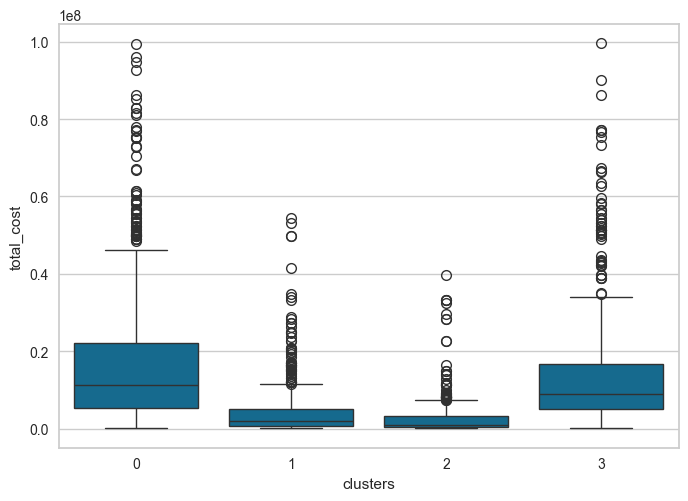

In [63]:
#bivariate analysis btw total cost vs clusters feature
sns.boxplot(x='clusters', y='total_cost',data=data3);

<Axes: xlabel='country', ylabel='total_cost'>

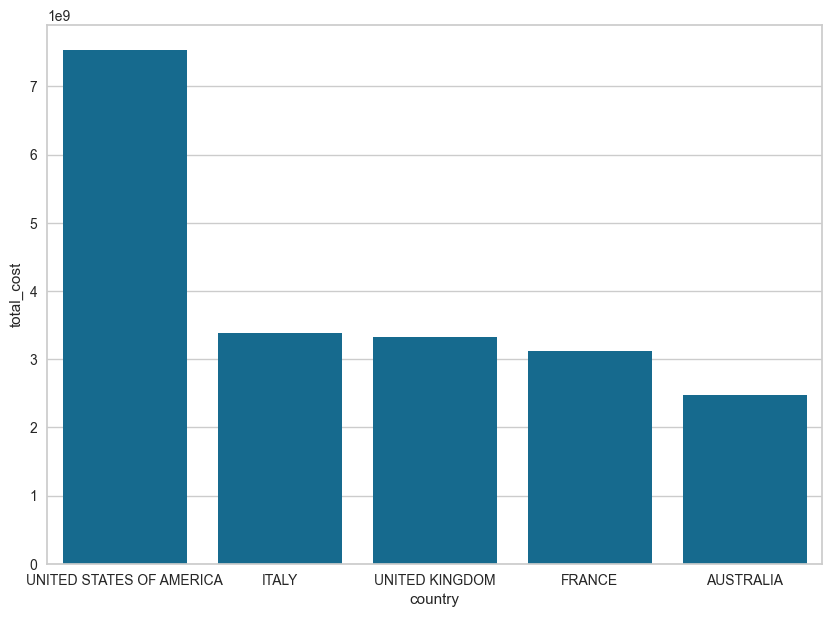

In [64]:
countries = data3.groupby("country")["total_cost"].sum().reset_index()
top_5_countries = countries.sort_values('total_cost',ascending = False)

top_5 = top_5_countries.head()
top_5

plt.figure(figsize=(10,7))
sns.barplot(data=top_5, x="country", y="total_cost")

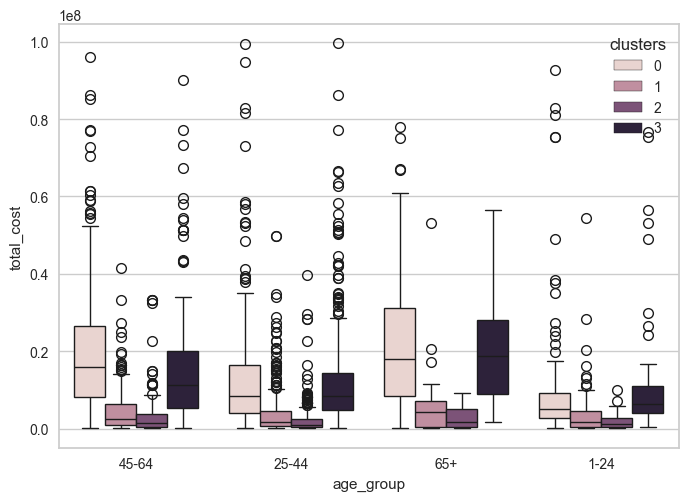

In [65]:
#multivariate distribution between the total cost vs age_group vs new clusters features
sns.boxplot(x='age_group', y='total_cost', hue='clusters', data=data3);

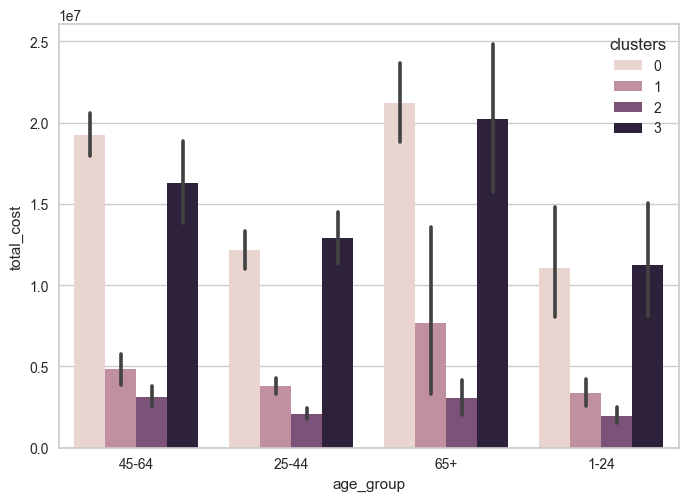

In [66]:
sns.barplot(x='age_group', y='total_cost', hue='clusters', data=data3);

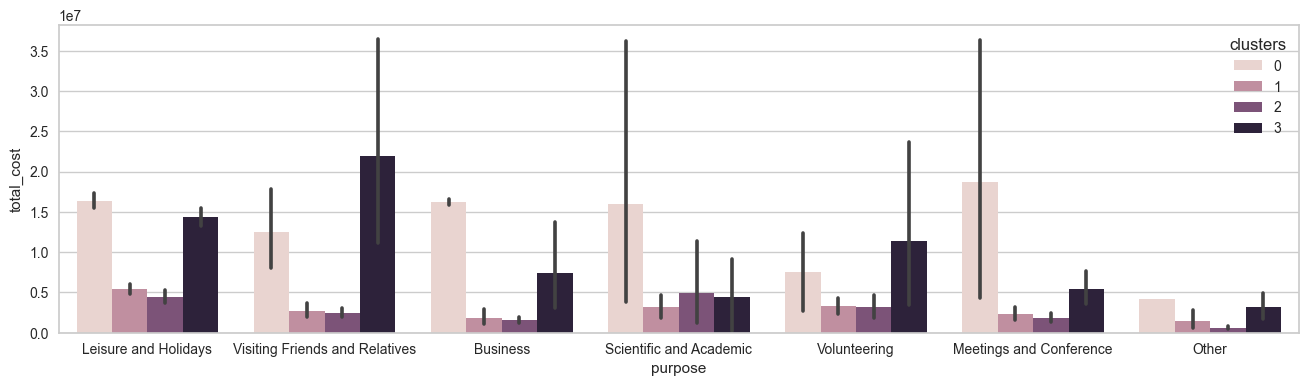

In [67]:
#mulitvariate analysis btw the total_cost vs purpose vs clusters feature
plt.figure(figsize=(16,4))
sns.barplot(x='purpose', y='total_cost', hue='clusters', data=data3);

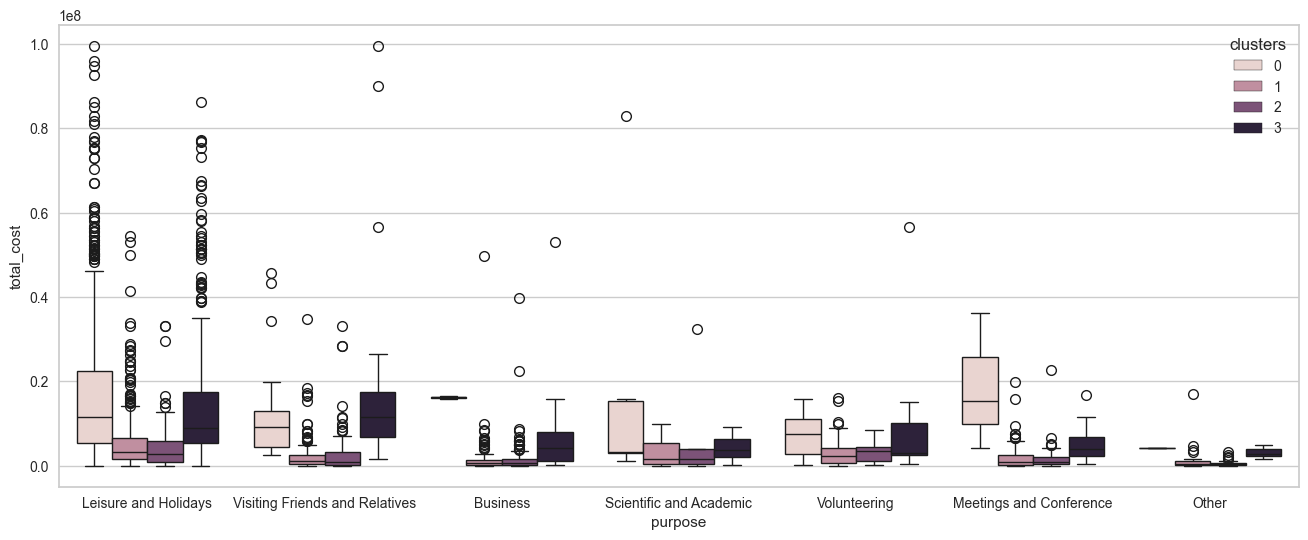

In [68]:
plt.figure(figsize=(16,6))
sns.boxplot(x='purpose', y='total_cost', hue='clusters', data=data3);

**observations**
- we can observe from the distribution of the new feature that by far from our dataset, we have the 1st cluster taking a large portion of
the sample dataset with a 1200 observations, loosely followed by cluster o which has 800 data observations, the last being cluster 3, with
aproximately 580 data points
- from looking at the total cost distribution vs the clusters feature, we can correctly infer that by far, cluster 1 and cluster 3 represent high value(high spending) tourists group, while cluster2 and cluster0 represents mostly low value(low spending) tourist group
- looking at the relationships accross age groups, we see that, though we have a good spread of the cluster amongst all age groups, there is a significantly higher spending power amongs the 65+ age group, while on the other end of the spectrum we have the lowest spending power amongst the 1-24 yrs age group

 what other insights can you gleam from this exploration??

### Based on the analysis what are your recommendations to the Tanzanian Tourism board??

The Board should invest more in advertisement targeting people in the age group 65+ because they of they are high spender and the peolpe in Cluster 0 due to their high tourism. 
Also they should offer discount promo for the people in this age group. 
More revenue is generated from visiting family and friends, the board should invest on programs that will enhance family/friends visit. They should liase with ministry incharge of visa to make visitors permit less restrictive.

Emphasize unique activities and experiences, highlight diverse travel arrangements.
Promote comprehensive package deals, target first-time visitors with all-inclusive offers.
Focus on family and group travel packages, highlight cost-effective packages.
Promote diverse experiences, tailor messages to first-time visitors highlighting unique impressions.
Promote luxury safari packages to older travelers through high end travel magazines and exclusive online platforms